In [1]:
import pandas as pd
import os

In [2]:
data_dir = '../MMHS150K'
df = pd.read_json(os.path.join(data_dir, 'MMHS150K_GT.json'),\
                  lines=False, orient='index', convert_dates=False)

df = df.reset_index()

df['id'] = df['tweet_url'].str.extract(r'/status/(\d+)')

df['img'] = 'img_resized/'+df['id']+'.jpg'

# Folder containing the JSON files
json_folder = os.path.join(data_dir,'img_txt')

# Function to load "img_text" from a given ID's JSON file
def load_img_text(row_id):
    file_path = os.path.join(json_folder, f"{row_id}.json")
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            return data.get("img_text", None)
    except Exception as e:
        # print(f"Warning: Could not read {file_path} — {e}")
        return None

# Apply the function to the 'id' column to create a new column
df['img_text'] = df['id'].apply(load_img_text)

def label_agg(row):
    res = 0
    for x in row:
        if x != 0:
            res+= 1
    return res

df['label'] = df['labels'].apply(label_agg)

MM_df = df[['img', 'img_text','tweet_text','label','id']].copy()

In [4]:
pickle_path = os.path.join(data_dir, "df.pkl")

In [ ]:
# MM_df.to_pickle(pickle_path)

In [23]:
df = pd.read_pickle(pickle_path)

In [24]:
df


,img,img_text,tweet_text,label,id
0,img_resized/1114679353714016256.jpg,None,@FriskDontMiss Nigga https://t.co/cAsaLWEpue,3,1114679353714016256
1,img_resized/1063020048816660480.jpg,None,My horses are retarded https://t.co/HYhqc6d5WN,3,1063020048816660480
2,img_resized/1108927368075374593.jpg,None,“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL S...,0,1108927368075374593
3,img_resized/1114558534635618305.jpg,None,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,1,1114558534635618305
4,img_resized/1035252480215592966.jpg,None,“EVERYbody calling you Nigger now!” https://t....,2,1035252480215592966
...,...,...,...,...,...
149818,img_resized/1114170734472048640.jpg,None,@svdate @gtconway3d I would just say hes Donny...,2,1114170734472048640
149819,img_resized/1110368198786846720.jpg,None,@Cheftime_Dev congrats my nigga keep on grindi...,0,1110368198786846720
149820,img_resized/1106941858540851200.jpg,None,My nigga big shitty https://t.co/e0snJGBgH9,1,1106941858540851200
149821,img_resized/1105268309233188865.jpg,None,did she just say “my nigga” to Rich? &amp; she...,1,1105268309233188865


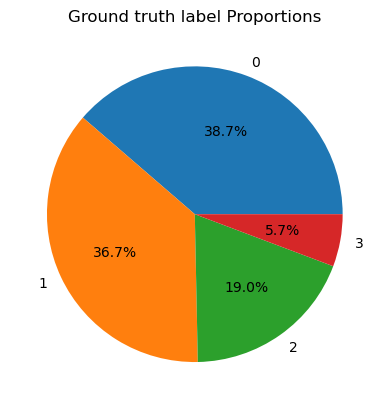

In [25]:
import matplotlib.pyplot as plt
# df = train_df
# Assuming `df` is your pandas DataFrame with a 'label' column
# Compute the counts for each label (0–3)
counts = df['label'].value_counts().sort_index()
labels = counts.index.astype(str)
sizes = counts.values

# Create a pie chart
plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Ground truth label Proportions')
plt.show()

New label distribution:
label
0    28966
1    27462
2    28395
3    17148
Name: count, dtype: int64


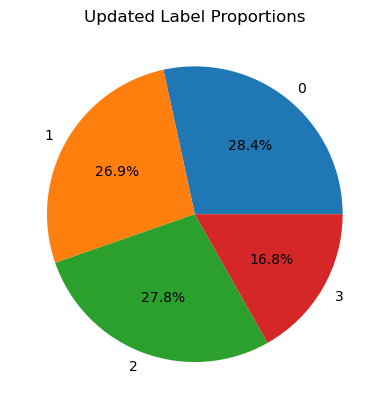

In [9]:

# 1. Separate by label
df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]
df_2 = df[df['label'] == 2]
df_3 = df[df['label'] == 3]

# 2. Remove half of label 0 and label 1 randomly
df_0_down = df_0.sample(frac=0.5, random_state=42).reset_index(drop=True)
df_1_down = df_1.sample(frac=0.5, random_state=42).reset_index(drop=True)

# 3. Double the label 3 rows
df_3_doubled = pd.concat([df_3, df_3], ignore_index=True)

# 4. Combine the new DataFrame
df_new = pd.concat([df_0_down, df_1_down, df_2, df_3_doubled], ignore_index=True)

# 5. Shuffle the combined DataFrame
df_new = df_new.sample(frac=1, random_state=42).reset_index(drop=True)

# 6. (Optional) View new class counts
print("New label distribution:")
print(df_new['label'].value_counts().sort_index())

# 7. Plot updated proportions
counts_new = df_new['label'].value_counts().sort_index()
labels = counts_new.index.astype(str)
sizes = counts_new.values

plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Updated Label Proportions')
plt.show()

In [20]:
MM_df = df

# Load split files
def load_ids(filepath):
    with open(filepath, 'r') as f:
        return set(line.strip() for line in f)

train_ids = load_ids(os.path.join(data_dir, 'splits/train_ids.txt'))
test_ids = load_ids(os.path.join(data_dir, 'splits/test_ids.txt'))
val_ids = load_ids(os.path.join(data_dir, 'splits/val_ids.txt'))

# Filter the DataFrame
train_df =  MM_df[ MM_df['id'].isin(train_ids)].copy()
test_df =  MM_df[ MM_df['id'].isin(test_ids)].copy()
val_df =  MM_df[ MM_df['id'].isin(val_ids)].copy()

In [21]:
train_df

,img,img_text,tweet_text,label,id
0,img_resized/1114679353714016256.jpg,None,@FriskDontMiss Nigga https://t.co/cAsaLWEpue,3,1114679353714016256
1,img_resized/1063020048816660480.jpg,None,My horses are retarded https://t.co/HYhqc6d5WN,3,1063020048816660480
2,img_resized/1108927368075374593.jpg,None,“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL S...,0,1108927368075374593
3,img_resized/1114558534635618305.jpg,None,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,1,1114558534635618305
5,img_resized/1106978219654303744.jpg,None,“ real ass bitch give a fuck boutta nigga” htt...,0,1106978219654303744
...,...,...,...,...,...
149818,img_resized/1114170734472048640.jpg,None,@svdate @gtconway3d I would just say hes Donny...,2,1114170734472048640
149819,img_resized/1110368198786846720.jpg,None,@Cheftime_Dev congrats my nigga keep on grindi...,0,1110368198786846720
149820,img_resized/1106941858540851200.jpg,None,My nigga big shitty https://t.co/e0snJGBgH9,1,1106941858540851200
149821,img_resized/1105268309233188865.jpg,None,did she just say “my nigga” to Rich? &amp; she...,1,1105268309233188865


In [18]:
test_df

,img,img_text,tweet_text,label,id
39,img_resized/1115275629476372480.jpg,None,@BF_Flipsta @JazTheRapper nigga got them: http...,0,1115275629476372480
84,img_resized/1114404944499625984.jpg,None,@Mierrr4 @jeffromda4 Bout time a nigga said it...,0,1114404944499625984
167,img_resized/1107329660558471171.jpg,None,@tariqnasheed You better wash yo ass you dumba...,1,1107329660558471171
195,img_resized/1107665629409099777.jpg,None,@Sino_Nathi @mbusolow This nigga needs to do l...,0,1107665629409099777
199,img_resized/1117318148275961856.jpg,None,#Clothespin fun for #faggot Andrew #gay #expos...,2,1117318148275961856
...,...,...,...,...,...
149692,img_resized/1115510593635737600.jpg,None,When a nigga is taking you for a fool 😂😂😂😂 htt...,0,1115510593635737600
149703,img_resized/1106873491771527173.jpg,None,Me and aldo are rippin the arse out of this lm...,1,1106873491771527173
149728,img_resized/1105704363635429376.jpg,None,@ARedd252 Alright...well that’s enough banter....,1,1105704363635429376
149769,img_resized/1105647057061191680.jpg,None,faggot in need of attention https://t.co/sRBAa...,3,1105647057061191680


In [19]:
val_df

,img,img_text,tweet_text,label,id
4,img_resized/1035252480215592966.jpg,None,“EVERYbody calling you Nigger now!” https://t....,2,1035252480215592966
8,img_resized/1045809514740666370.jpg,None,#sissy faggot https://t.co/bm1nk8HcYO,2,1045809514740666370
18,img_resized/1107795783066312704.jpg,None,@FreedomzWriterx Check out this nigger😭 https:...,0,1107795783066312704
22,img_resized/1055176608624058368.jpg,None,NIGGA. Wya? https://t.co/weesxKtWqG,1,1055176608624058368
24,img_resized/1058046993044570119.jpg,None,motivation from my favorite twat ❤️🍞🏃🏻‍♂️ http...,1,1058046993044570119
...,...,...,...,...,...
149469,img_resized/1117546226587787264.jpg,None,Me to my side nigga: I'll be there 10.00 pm la...,1,1117546226587787264
149545,img_resized/1105668241081491456.jpg,None,It's a real nigga party you cannot get in!!!!!...,0,1105668241081491456
149629,img_resized/1108932759903301632.jpg,None,Alright you still facing about 15 years 69: y...,0,1108932759903301632
149662,img_resized/1116886871467016192.jpg,None,"@Lean_Buscaglia_ Please NIGGA MAKE HIEI, TSUNA...",0,1116886871467016192
